#### Michael Beven
#### University of Chicago - Financial Mathematics
#### Quantitative Strategies and Regression - FINM 33150
##### Problem 1

In [14]:
# make plots come up in this window
%matplotlib inline 

# import packages
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from pandas.stats.api import ols
import Quandl
import functools
import seaborn as sns
import ggplot as gg

script = sys.argv

print('Script/file name: {}' .format(script))

Script/file name: ['/Users/michaelbeven/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py', '-f', '/Users/michaelbeven/Library/Jupyter/runtime/kernel-6640d4b6-2351-4cf5-9e77-443a9243fc10.json']


In [15]:
# grab data
raw_data = Quandl.get(list(("YAHOO/MSFT","WIKI/BAC")),
    authtoken="v21snmSix9KyXBWc1RkF",
    trim_start="2015-10-15",
    trim_end="2015-11-09",
    returns="pandas")
print(pd.DataFrame(raw_data.columns))

                              0
0             YAHOO.MSFT - Open
1             YAHOO.MSFT - High
2              YAHOO.MSFT - Low
3            YAHOO.MSFT - Close
4           YAHOO.MSFT - Volume
5   YAHOO.MSFT - Adjusted Close
6               WIKI.BAC - Open
7               WIKI.BAC - High
8                WIKI.BAC - Low
9              WIKI.BAC - Close
10            WIKI.BAC - Volume
11       WIKI.BAC - Ex-Dividend
12       WIKI.BAC - Split Ratio
13         WIKI.BAC - Adj. Open
14         WIKI.BAC - Adj. High
15          WIKI.BAC - Adj. Low
16        WIKI.BAC - Adj. Close
17       WIKI.BAC - Adj. Volume


In [16]:
# take a subset of columns of the close data
raw_data_close = raw_data.ix[:,('YAHOO.MSFT - Close','WIKI.BAC - Close')]

# can look through all the columns to see output
print(raw_data_close.ix[:,'YAHOO.MSFT - Close'])
print(raw_data_close.ix[:,'WIKI.BAC - Close'])

Date
2015-10-15    47.009998
2015-10-16    47.509998
2015-10-19    47.619999
2015-10-20    47.770000
2015-10-21    47.200001
2015-10-22    48.029999
2015-10-23    52.869999
2015-10-26    54.250000
2015-10-27    53.689999
2015-10-28    53.980000
2015-10-29    53.360001
2015-10-30    52.639999
2015-11-02    53.240002
2015-11-03    54.150002
2015-11-04    54.400002
2015-11-05    54.380001
2015-11-06    54.919998
2015-11-09    54.160000
Name: YAHOO.MSFT - Close, dtype: float64
Date
2015-10-15    16.19
2015-10-16    16.12
2015-10-19    16.14
2015-10-20    16.20
2015-10-21    15.90
2015-10-22    16.16
2015-10-23    16.52
2015-10-26    16.51
2015-10-27    16.40
2015-10-28    17.28
2015-10-29    17.09
2015-10-30    16.78
2015-11-02    17.06
2015-11-03    17.18
2015-11-04    17.01
2015-11-05    17.31
2015-11-06    17.95
2015-11-09    17.68
Name: WIKI.BAC - Close, dtype: float64


In [17]:
# run an OLS regression of MSFT on BAC close prices
regress = ols(y=raw_data_close["YAHOO.MSFT - Close"], x=raw_data_close["WIKI.BAC - Close"])
print(regress)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         18
Number of Degrees of Freedom:   2

R-squared:         0.6765
Adj R-squared:     0.6563

Rmse:              1.8280

F-stat (1, 16):    33.4637, p-value:     0.0000

Degrees of Freedom: model 1, resid 16

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.2979     0.7430       5.78     0.0000     2.8417     5.7542
     intercept   -20.2536    12.4515      -1.63     0.1234   -44.6585     4.1512
---------------------------------End of Summary---------------------------------



In [18]:
# calculate log returns on close prices
N = len(raw_data)
log_rets = np.log(raw_data_close) - np.log(raw_data_close.shift(1))
# remove NaN in first row
log_rets = log_rets.ix[1:-1,:]

# run an OLS regression of MSFT on BAC returns
regress_log_rets = ols(y=log_rets["YAHOO.MSFT - Close"], x=log_rets["WIKI.BAC - Close"])
print(regress_log_rets)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         16
Number of Degrees of Freedom:   2

R-squared:         0.1486
Adj R-squared:     0.0878

Rmse:              0.0246

F-stat (1, 14):     2.4437, p-value:     0.1403

Degrees of Freedom: model 1, resid 14

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.5069     0.3243       1.56     0.1403    -0.1287     1.1424
     intercept     0.0065     0.0065       0.99     0.3372    -0.0063     0.0192
---------------------------------End of Summary---------------------------------



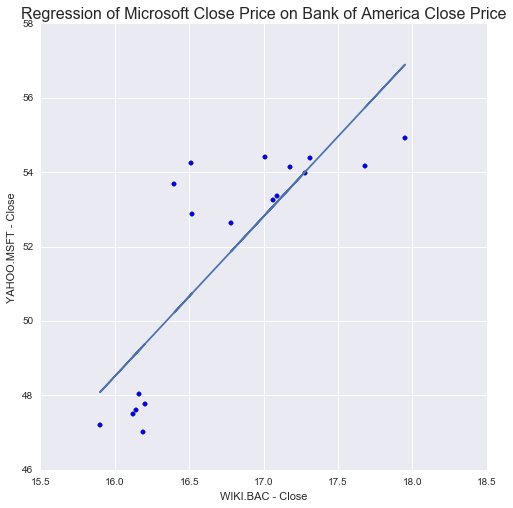

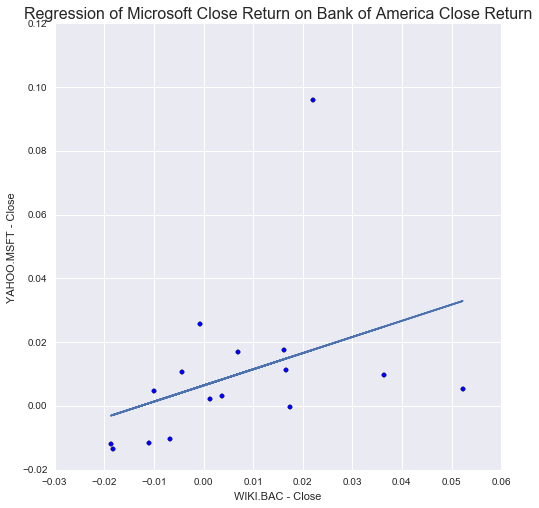

In [19]:
# plot prices regression
x = regress.x['x']
y = regress.beta[0]*x+regress.beta[1]
plt.figure(1,figsize=(8,8))
plt.plot(x,y)
plt.scatter(x,regress.y)
plt.ylabel('YAHOO.MSFT - Close')
plt.xlabel('WIKI.BAC - Close')
plt.title('Regression of Microsoft Close Price on Bank of America Close Price',fontsize=16)

# plot returns regression
x = regress_log_rets.x['x']
y = regress_log_rets.beta[0]*x+regress_log_rets.beta[1]
plt.figure(2,figsize=(8,8))
plt.plot(x,y)
plt.scatter(x,regress_log_rets.y)
plt.ylabel('YAHOO.MSFT - Close')
plt.xlabel('WIKI.BAC - Close')
plt.title('Regression of Microsoft Close Return on Bank of America Close Return',fontsize=16)